# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [4]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

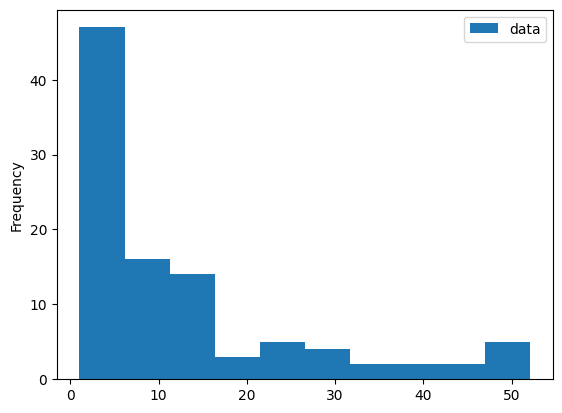

In [5]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

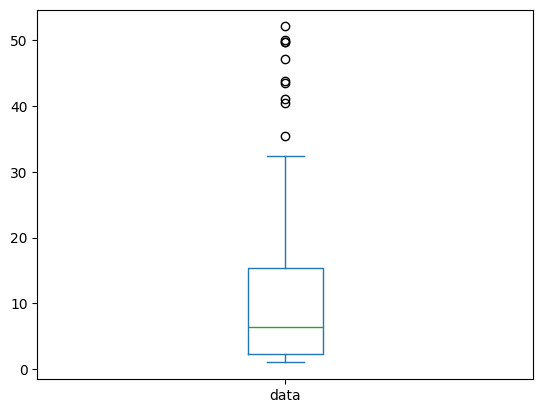

In [6]:
df.plot.box()

**Short Explanation**

Even though the histogram provides a clear view of the frequency distribution of the data and it's intuitive to read, it doesn't answer the question of the administrator which is understanding how the much more expensive drugs tend to cost. Based on the goal of the admin, I would choose the box plot since it shows the more expensive drugs as outliers. The box plot could also be improved by adding labels, colors and gridlines for the admin to easily read the graph

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Create dataframe for the cleaned data from Hwk2

US_Accidents_Cleaned = pd.read_csv('US_Accidents_Cleaned.csv')

US_Accidents_Cleaned.head(5)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Day,Night
0,A-2047758,Source2,2,2019-06-12 10:10:00,2019-06-12 10:55:00,30.641211,-91.153481,30.641211,-91.153481,0.000,...,False,False,True,False,Day,Day,Day,Day,True,False
1,A-4237356,Source1,2,2022-02-21 17:43:00,2022-02-21 19:43:00,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,Day,Day,Day,Day,True,False
2,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:00,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,Night,Night,Night,Night,False,True
3,A-1101469,Source2,2,2021-03-29 07:03:00,2021-03-29 08:51:00,42.532082,-70.944267,42.532082,-70.944267,0.000,...,False,False,True,False,Day,Day,Day,Day,True,False
4,A-7222249,Source1,2,2020-01-14 16:49:00,2020-01-14 20:49:00,42.421280,-123.119450,42.421280,-123.119450,0.000,...,False,False,False,False,Day,Day,Day,Day,True,False


In [ ]:
# Convert Start_Time and End_Time columns to datetime objects with errors='coerce' to handle invalid formats (same as hwk2)
US_Accidents_Cleaned['Start_Time'] = pd.to_datetime(US_Accidents_Cleaned['Start_Time'], errors='coerce')
US_Accidents_Cleaned['End_Time'] = pd.to_datetime(US_Accidents_Cleaned['End_Time'], errors='coerce')
US_Accidents_Cleaned['Weather_Timestamp'] = pd.to_datetime(US_Accidents_Cleaned['Weather_Timestamp'], errors='coerce')

In [10]:
US_Accidents_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43564 entries, 0 to 43563
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     43564 non-null  object        
 1   Source                 43564 non-null  object        
 2   Severity               43564 non-null  int64         
 3   Start_Time             43564 non-null  datetime64[ns]
 4   End_Time               43564 non-null  datetime64[ns]
 5   Start_Lat              43564 non-null  float64       
 6   Start_Lng              43564 non-null  float64       
 7   End_Lat                43564 non-null  float64       
 8   End_Lng                43564 non-null  float64       
 9   Distance(mi)           43564 non-null  float64       
 10  Description            43564 non-null  object        
 11  Street                 43564 non-null  object        
 12  City                   43564 non-null  object        
 13  C

In [11]:
# Select numeric and date columns
columns_to_plot = US_Accidents_Cleaned.select_dtypes(include=['number', 'datetime']).columns.tolist()

print("Numeric and Date columns to plot:", columns_to_plot)

Numeric and Date columns to plot: ['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']


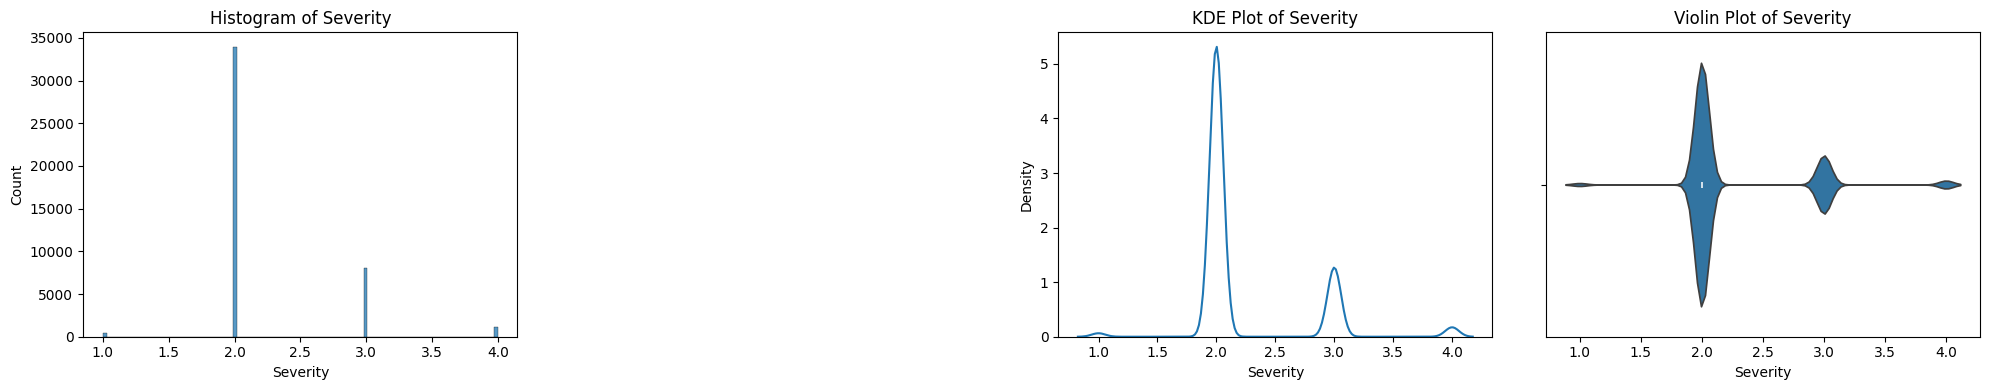

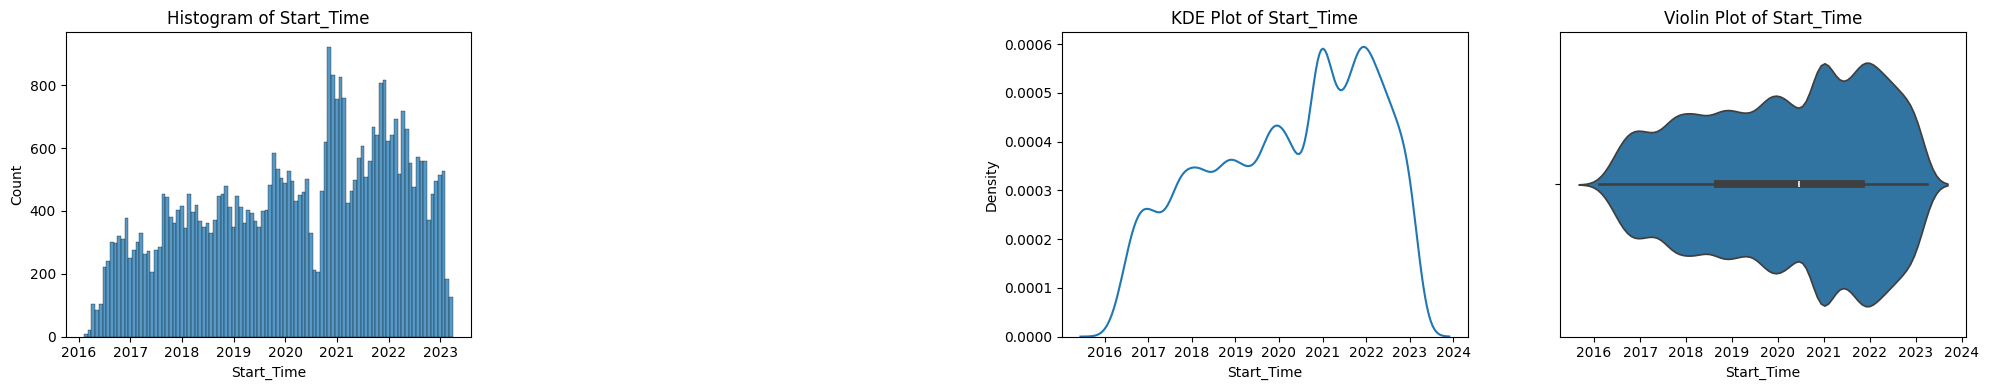

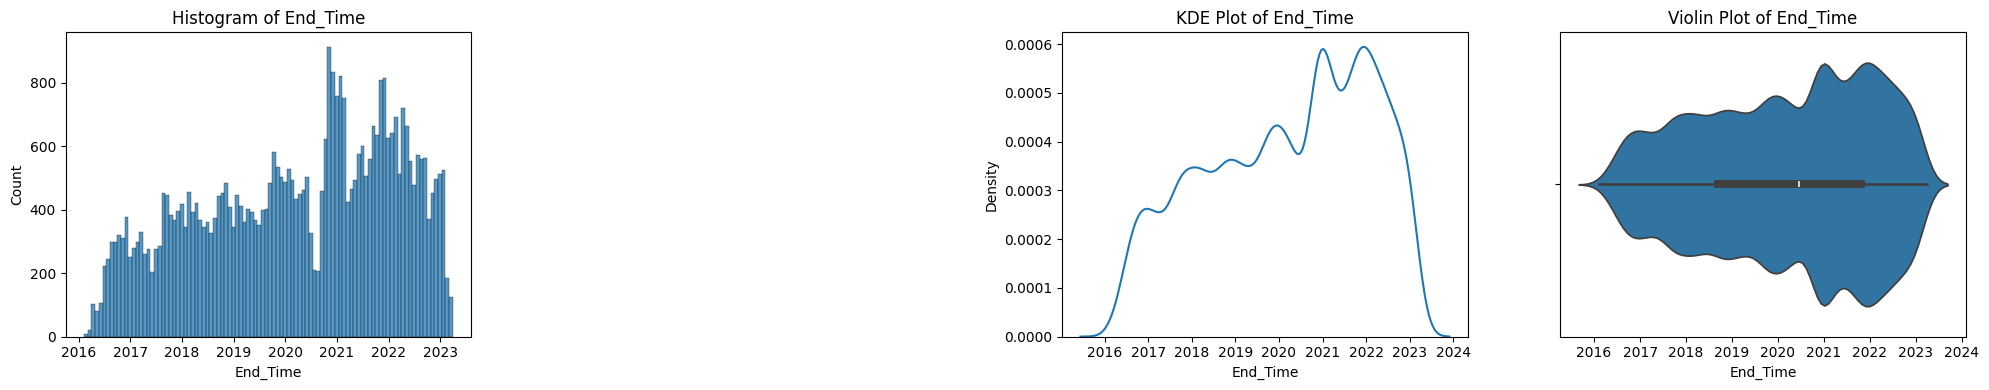

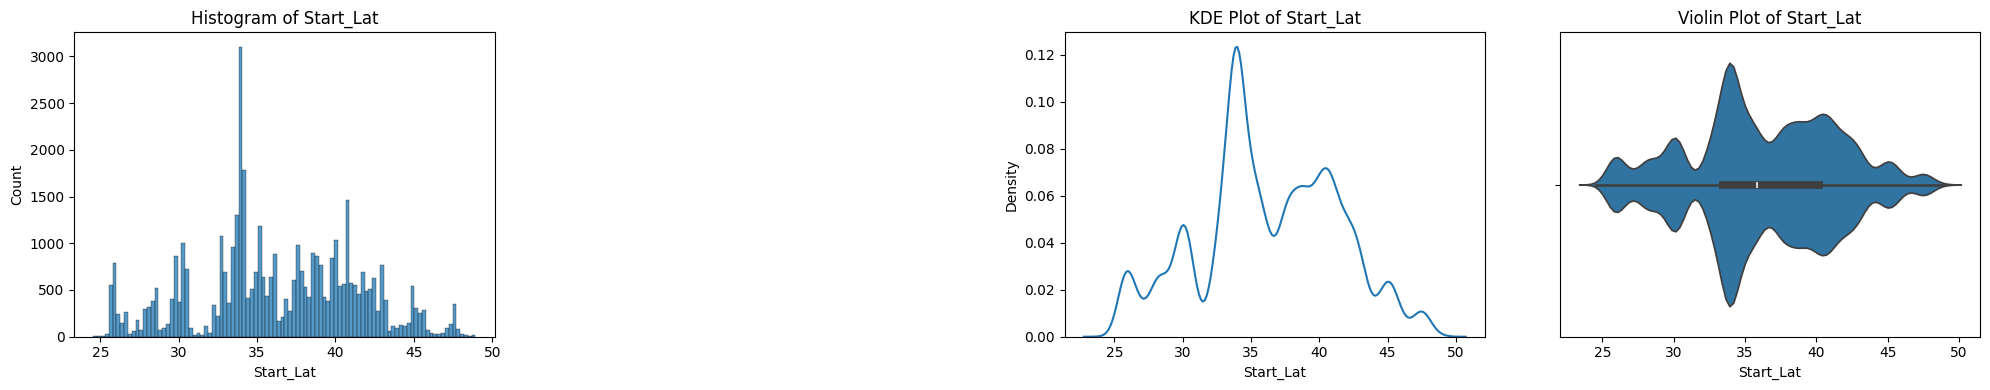

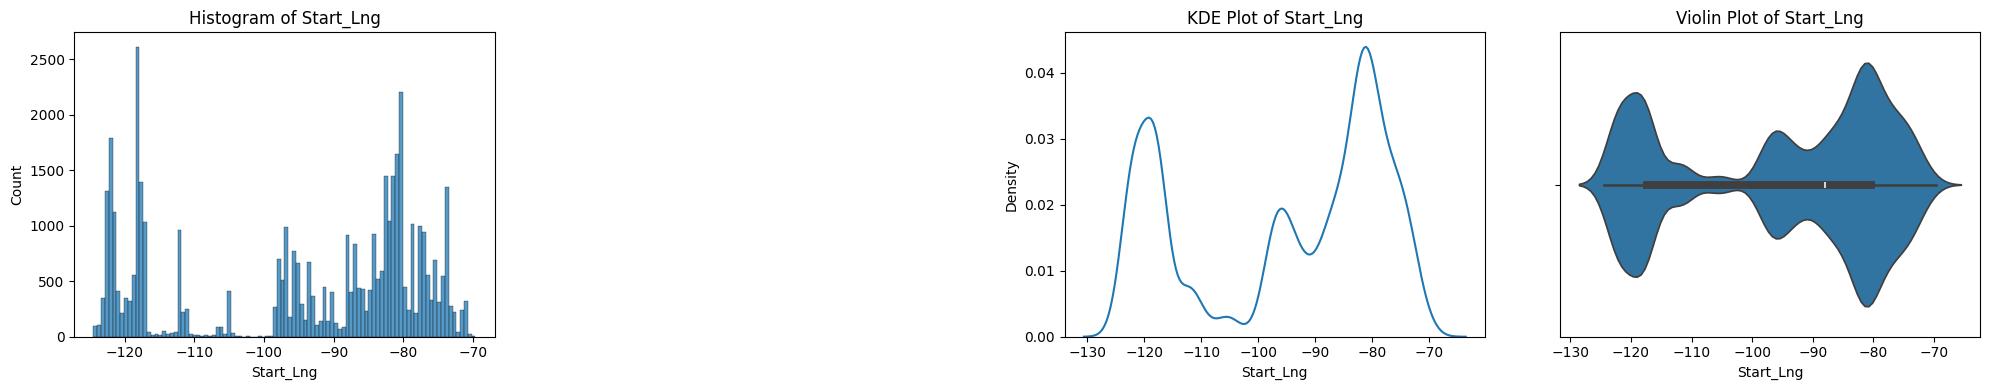

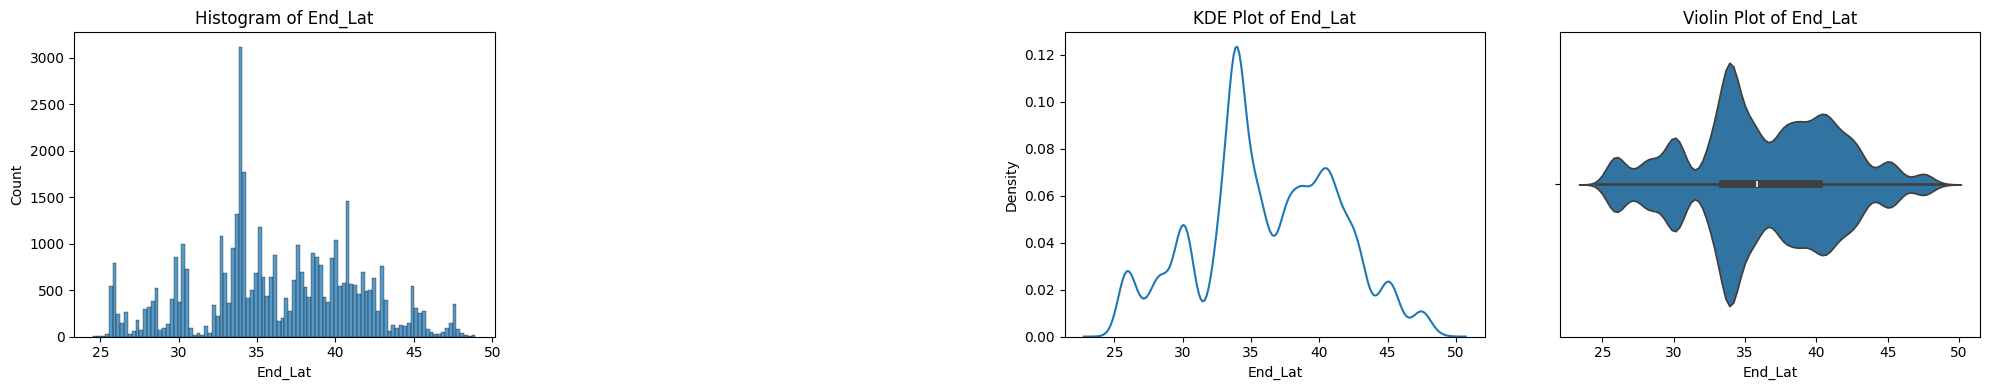

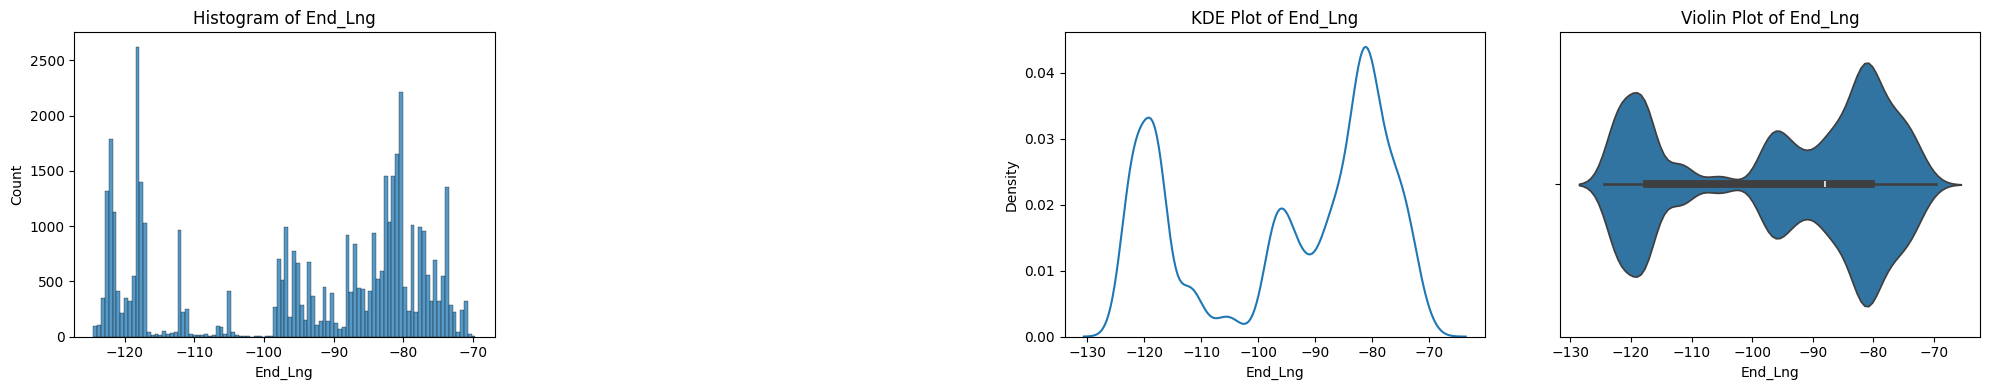

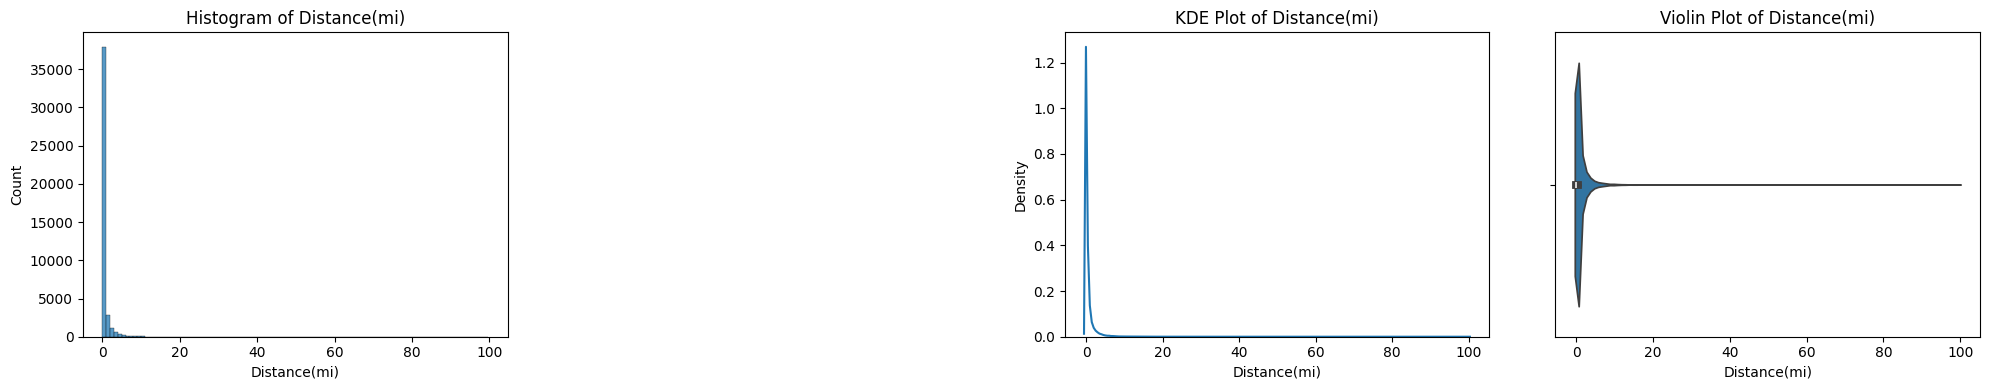

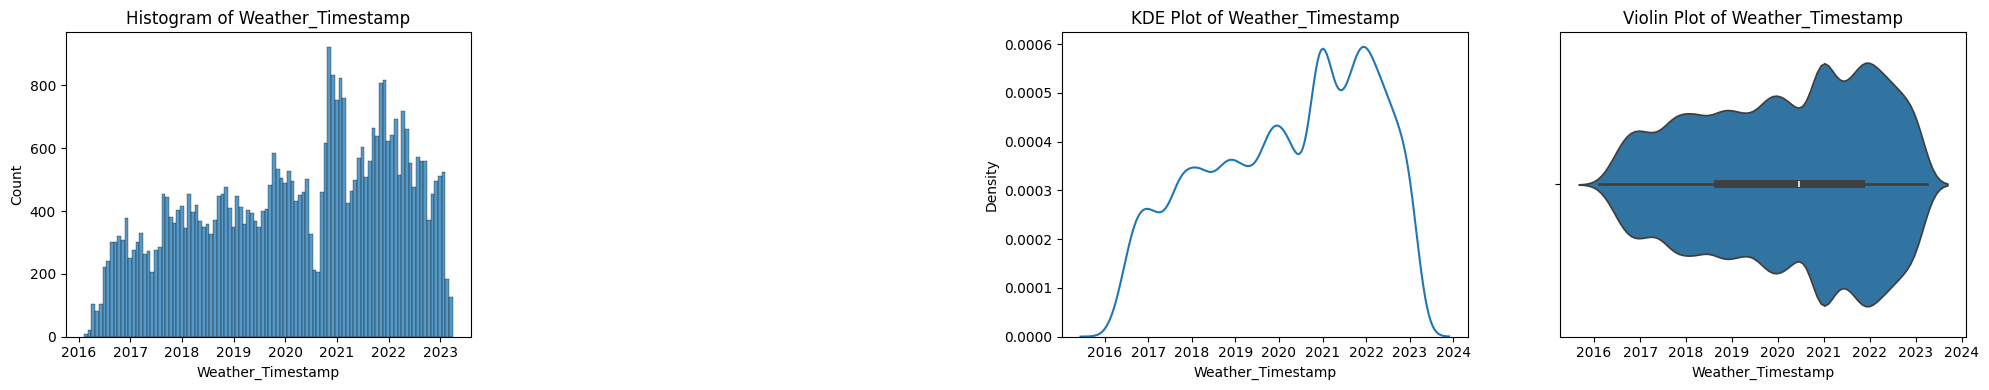

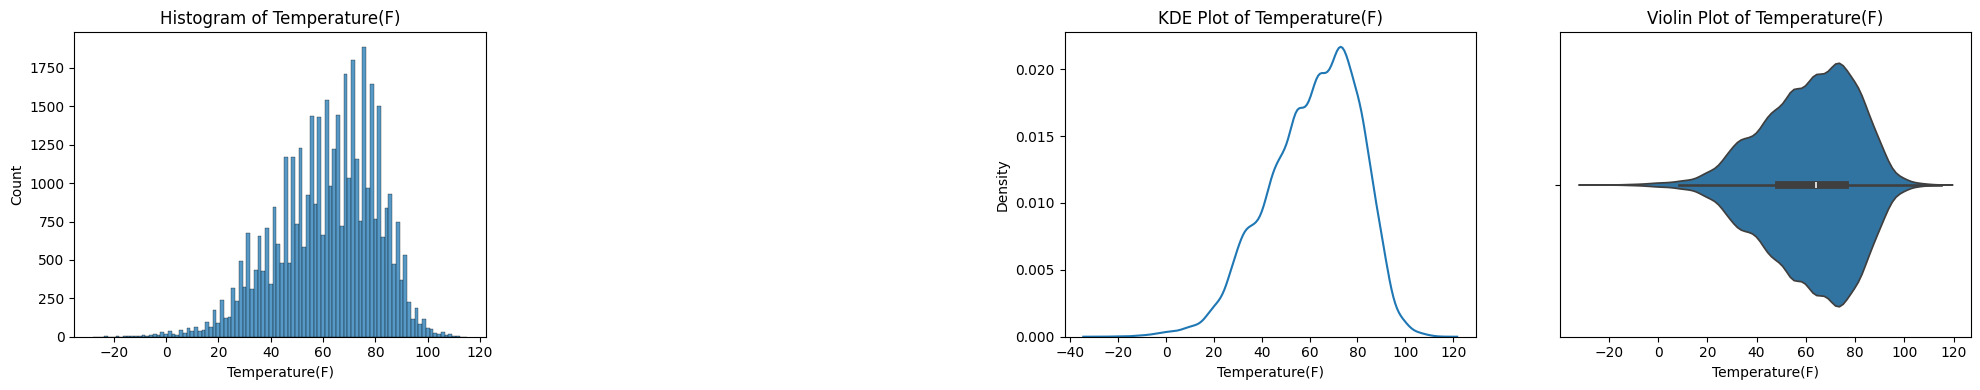

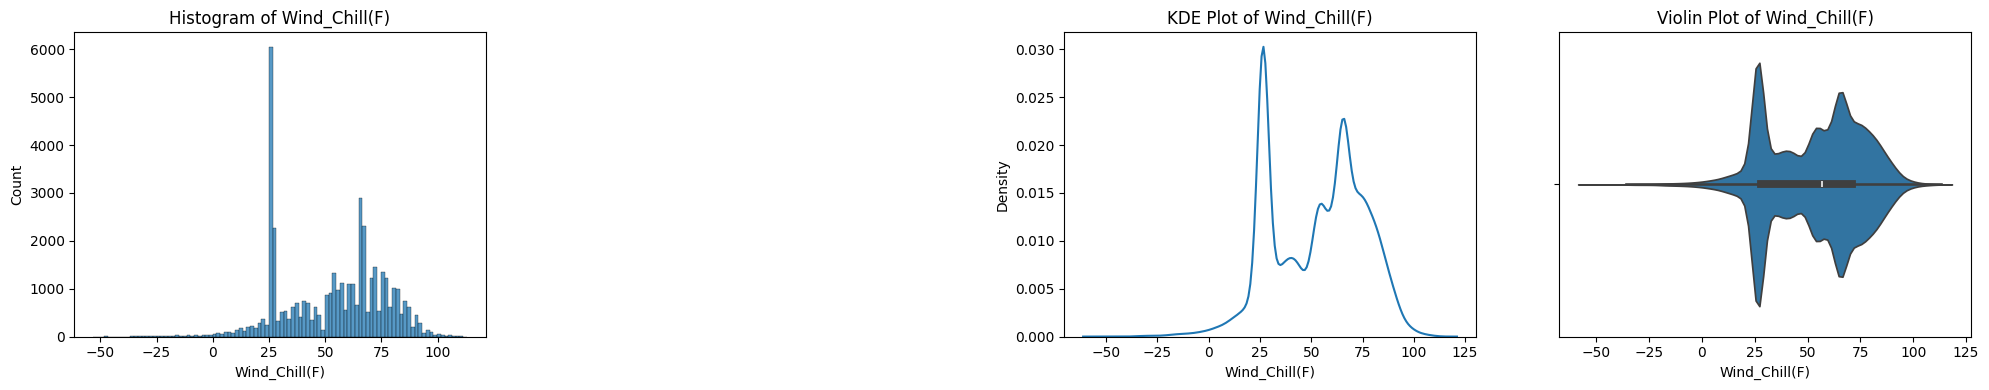

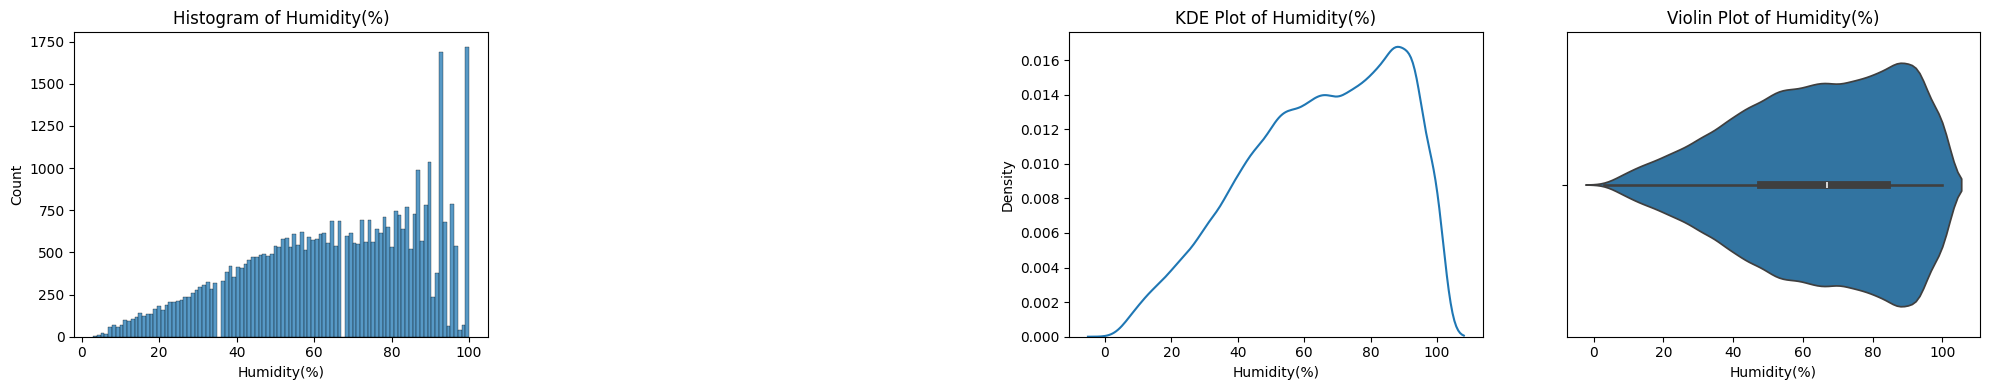

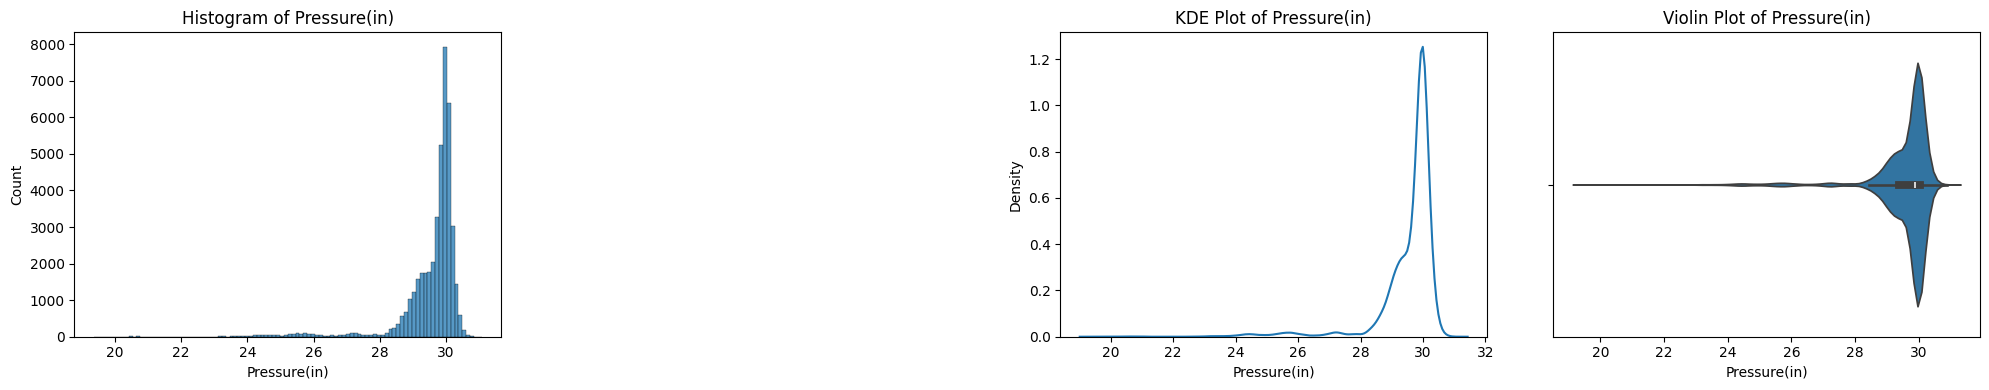

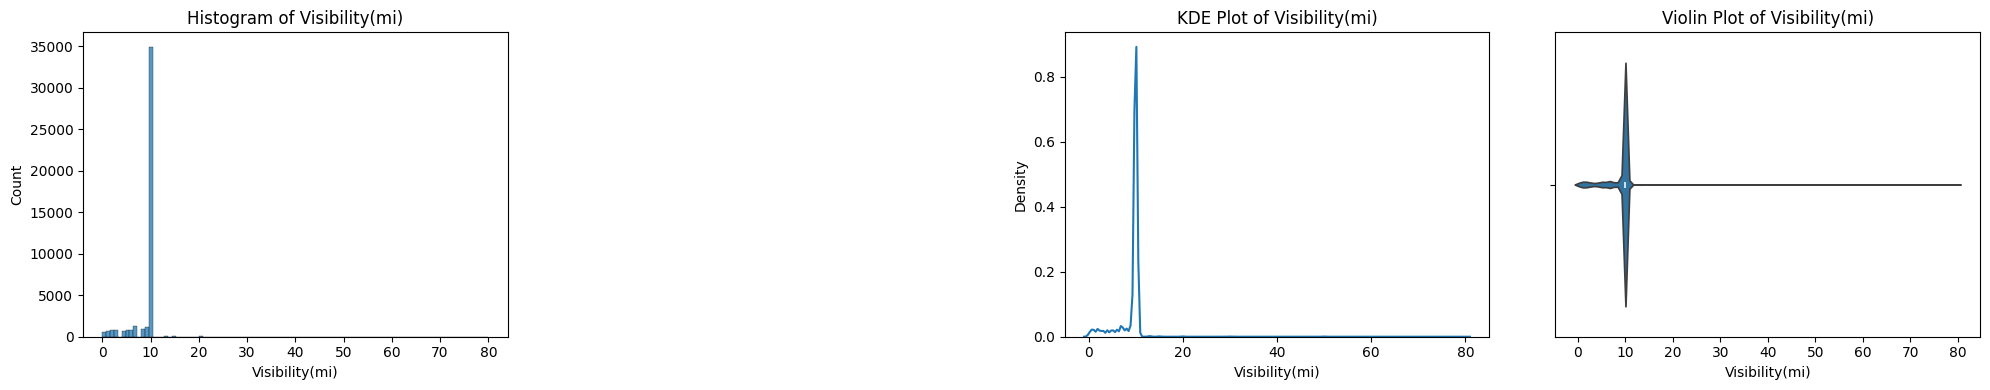

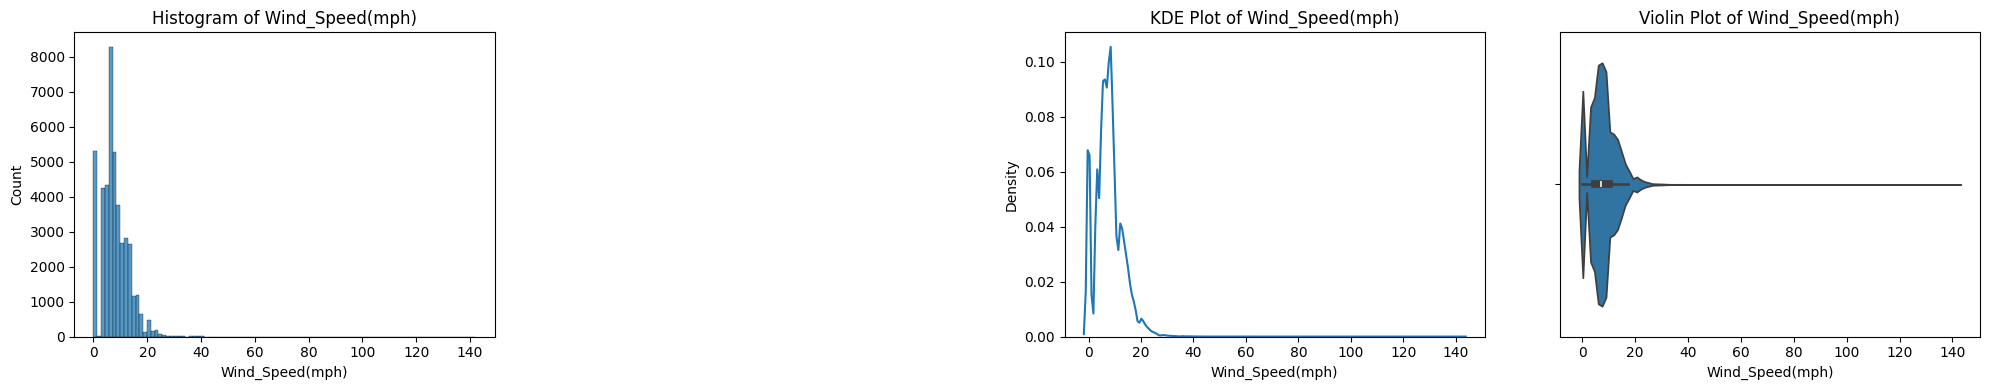

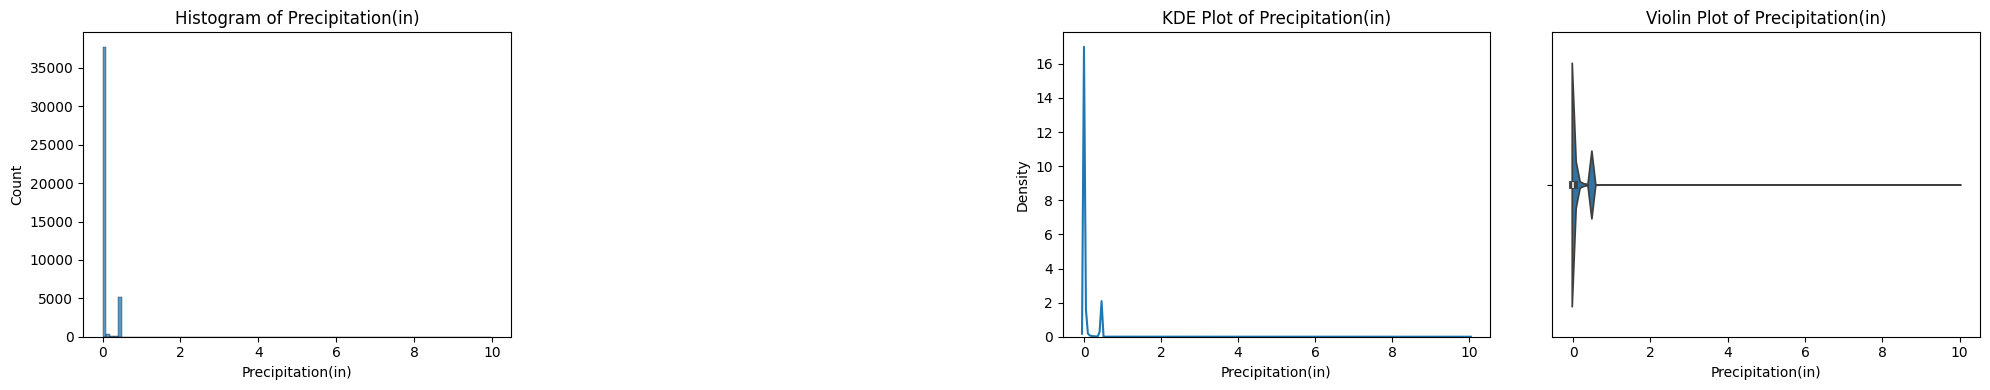

In [23]:


# Drawing histograms and variants
for column in columns_to_plot:
    plt.figure(figsize=(20, 4))

    # Histogram
    plt.subplot(1, 4, 1)
    sns.histplot(US_Accidents_Cleaned[column], bins = 100)
    plt.title(f'Histogram of {column}')

    # Swarm plot - commenting this out as it takes time to run
    #plt.subplot(1, 4, 2)
    #sns.swarmplot(x=US_Accidents_Cleaned[column])
    #plt.title(f'Swarm Plot of {column}')

    # KDE plot
    plt.subplot(1, 4, 3)
    sns.kdeplot(US_Accidents_Cleaned[column])
    plt.title(f'KDE Plot of {column}')

    # Violin plot
    plt.subplot(1, 4, 4)
    sns.violinplot(x=US_Accidents_Cleaned[column])
    plt.title(f'Violin Plot of {column}')

    plt.tight_layout()
    plt.show()


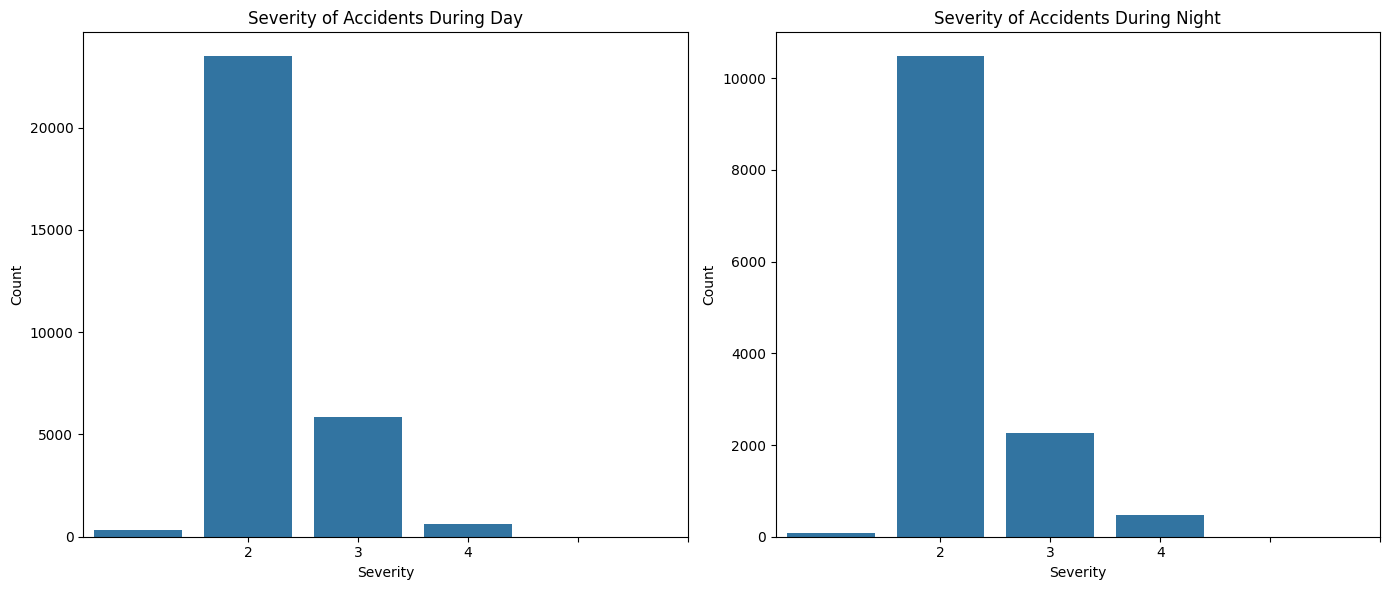

In [13]:
# Group by 'Sunrise_Sunset' and 'Severity'
grouped_data = US_Accidents_Cleaned.groupby(['Sunrise_Sunset', 'Severity']).size().reset_index(name='Count')
plt.figure(figsize=(14, 6))

# Histogram for day accidents
plt.subplot(1, 2, 1)
day_data = grouped_data[grouped_data['Sunrise_Sunset'] == 'Day']
sns.barplot(x='Severity', y='Count', data=day_data)
plt.title('Severity of Accidents During Day')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.xticks(range(1, 6))

# Histogram for night accidents
plt.subplot(1, 2, 2)
night_data = grouped_data[grouped_data['Sunrise_Sunset'] == 'Night']
sns.barplot(x='Severity', y='Count', data=night_data)
plt.title('Severity of Accidents During Night')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.xticks(range(1, 6))

plt.tight_layout()
plt.show()


In [14]:
grouped_data

,Sunrise_Sunset,Severity,Count
0,Day,1,329
1,Day,2,23480
2,Day,3,5828
3,Day,4,641
4,Night,1,78
5,Night,2,10479
6,Night,3,2266
7,Night,4,463


In [15]:
# Select categorical and boolean columns
categorical_columns = ['State', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

print("Categorical columns (including boolean):", categorical_columns)

Categorical columns (including boolean): ['State', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


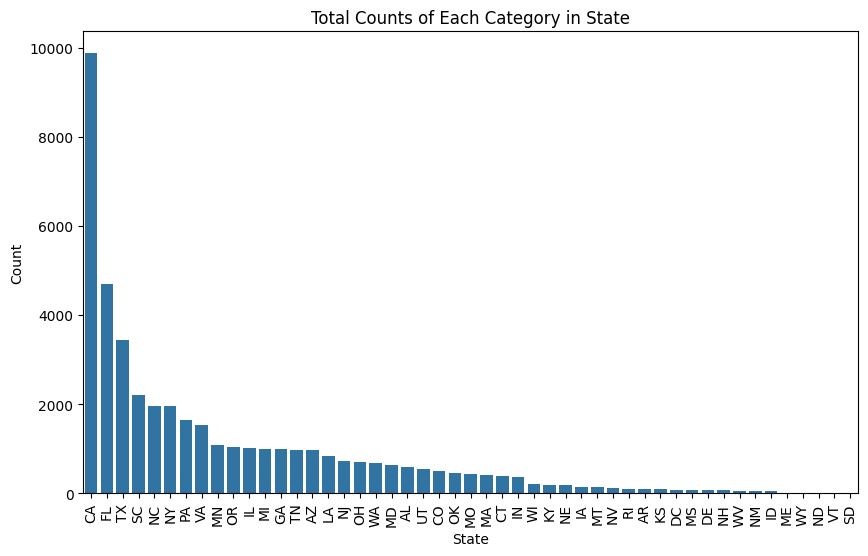

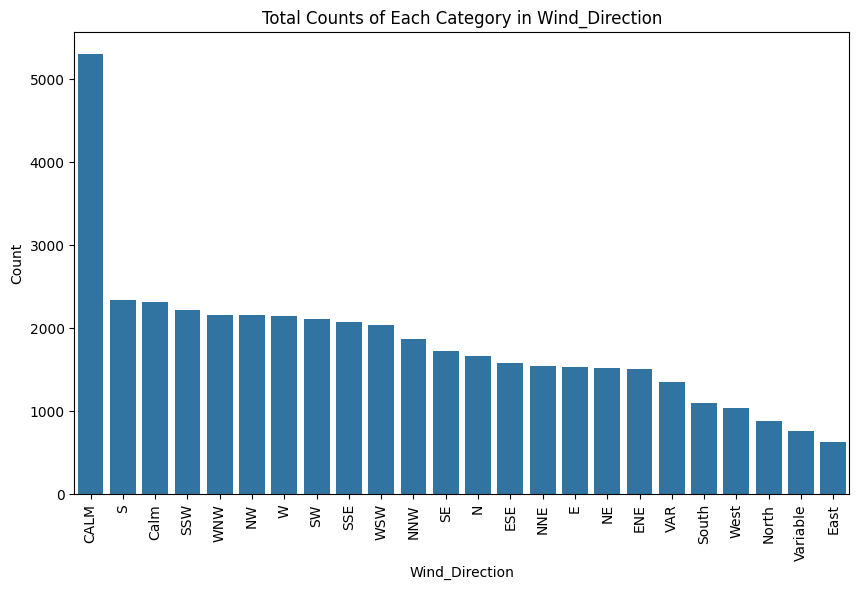

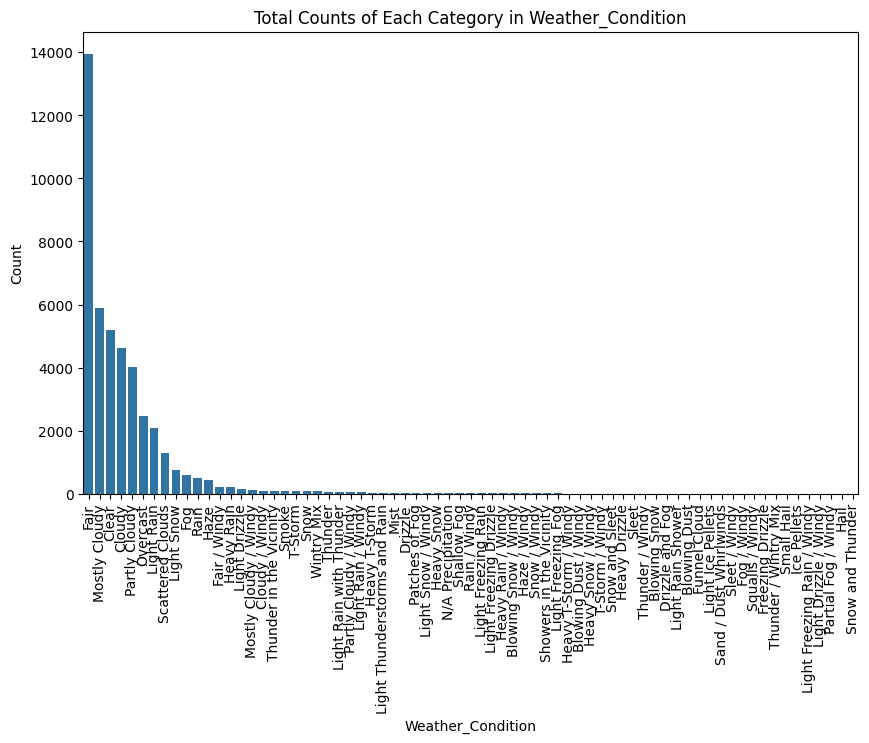

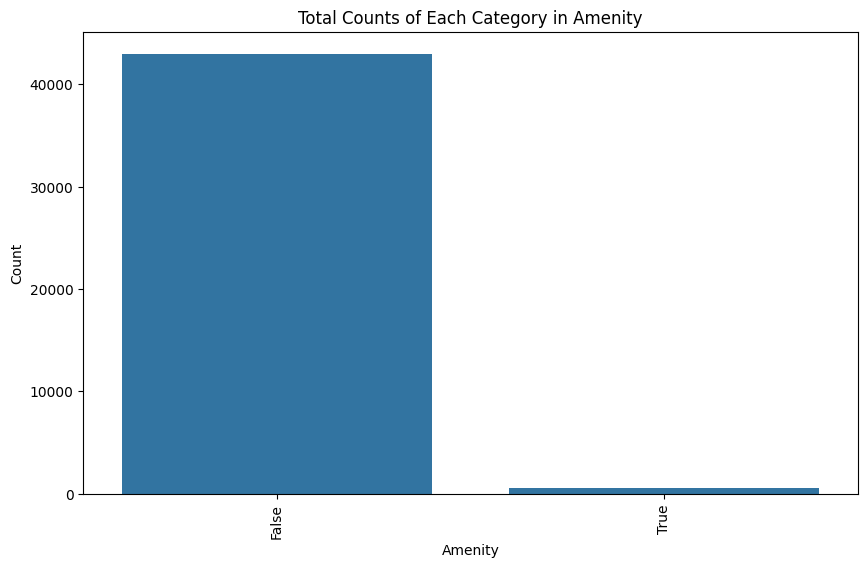

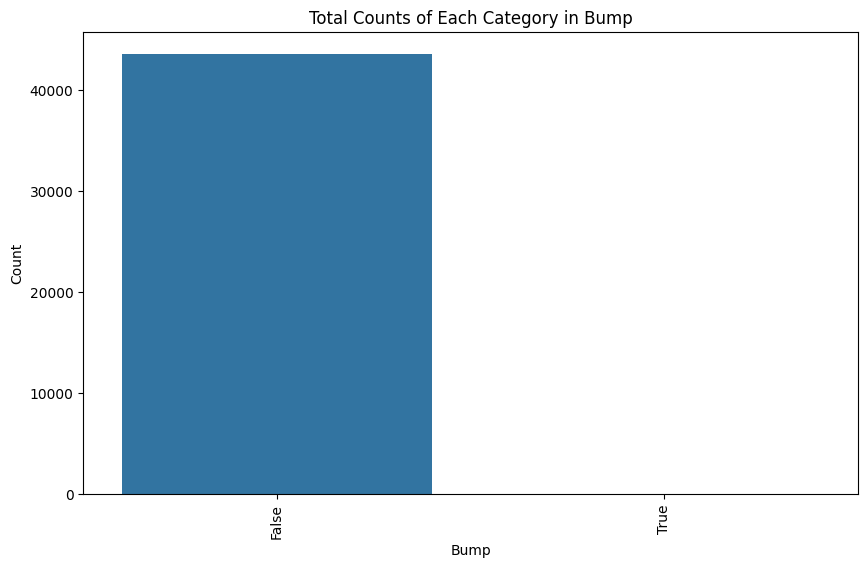

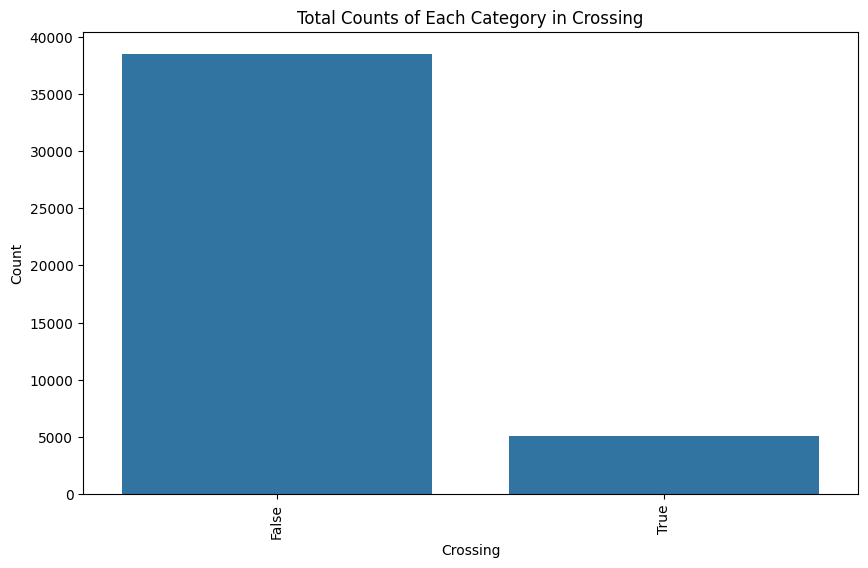

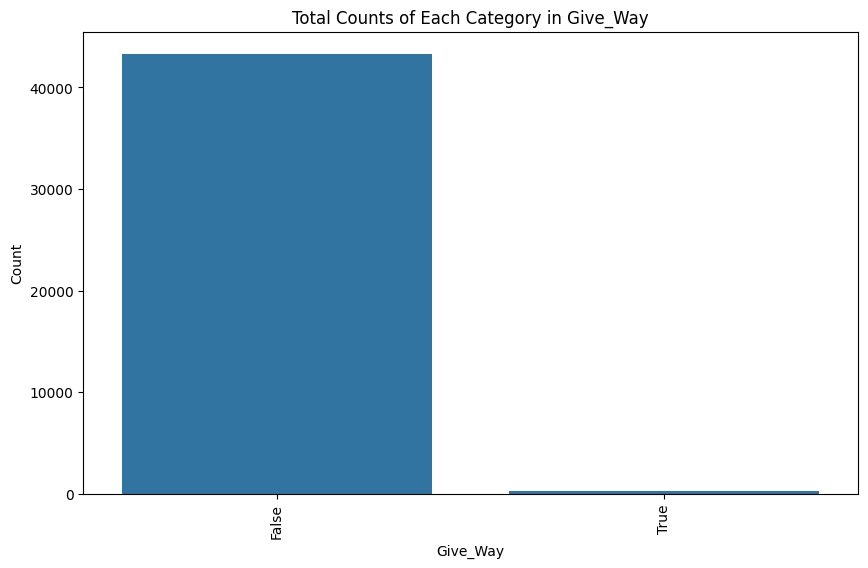

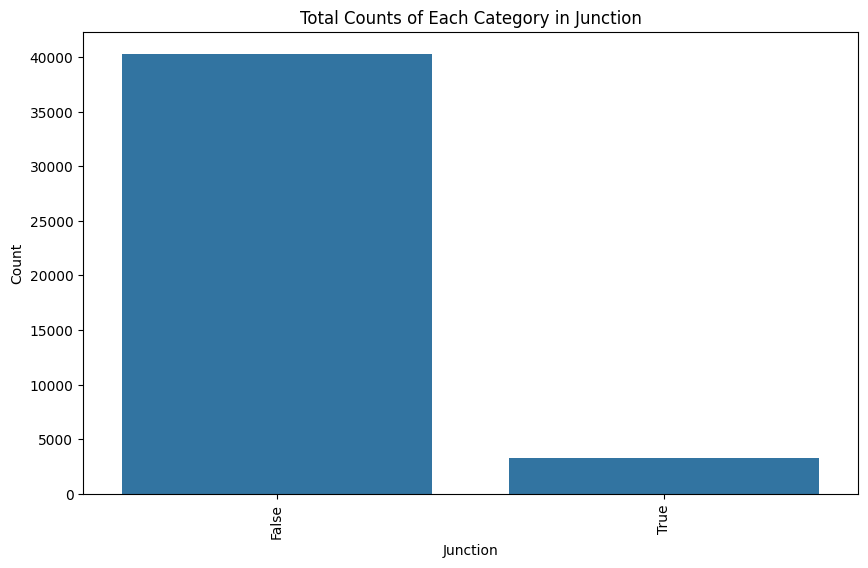

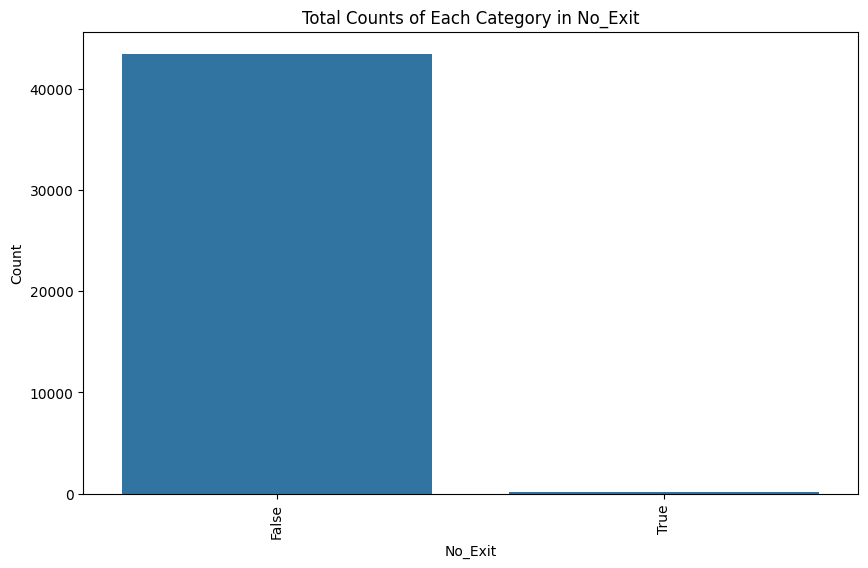

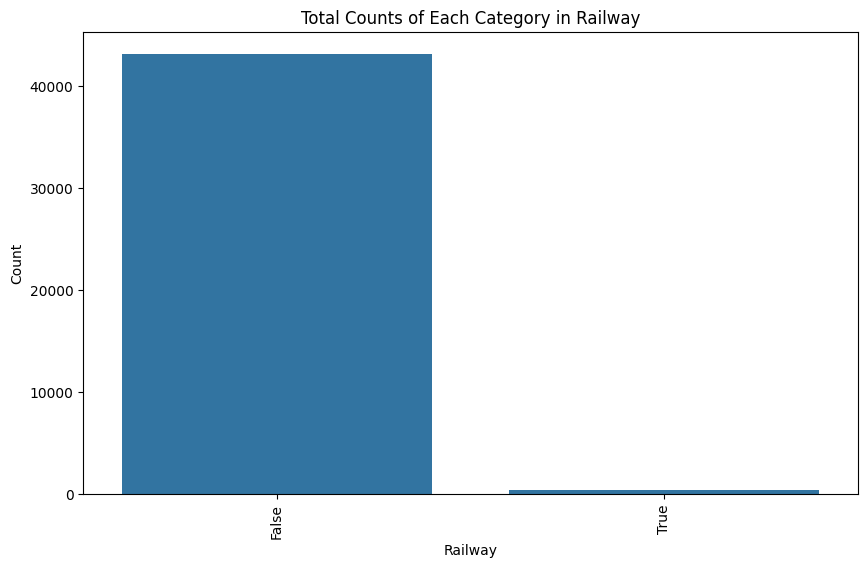

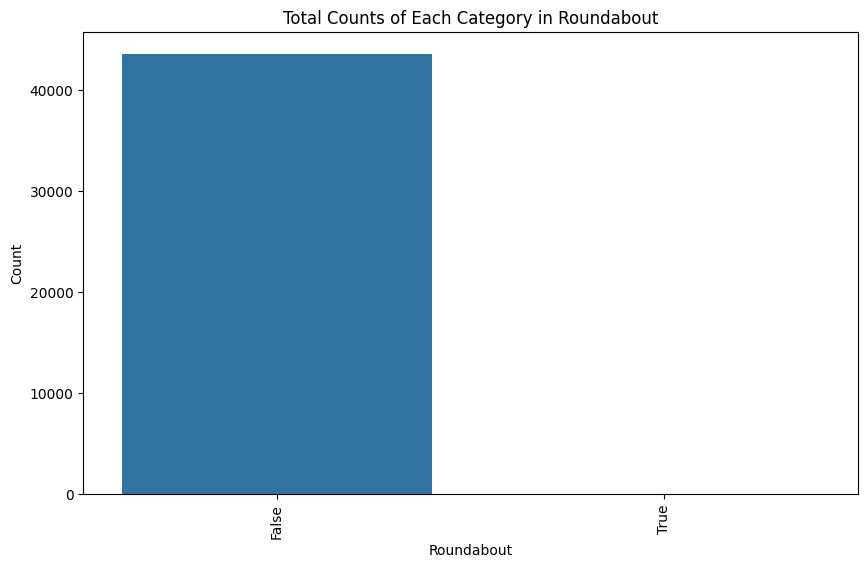

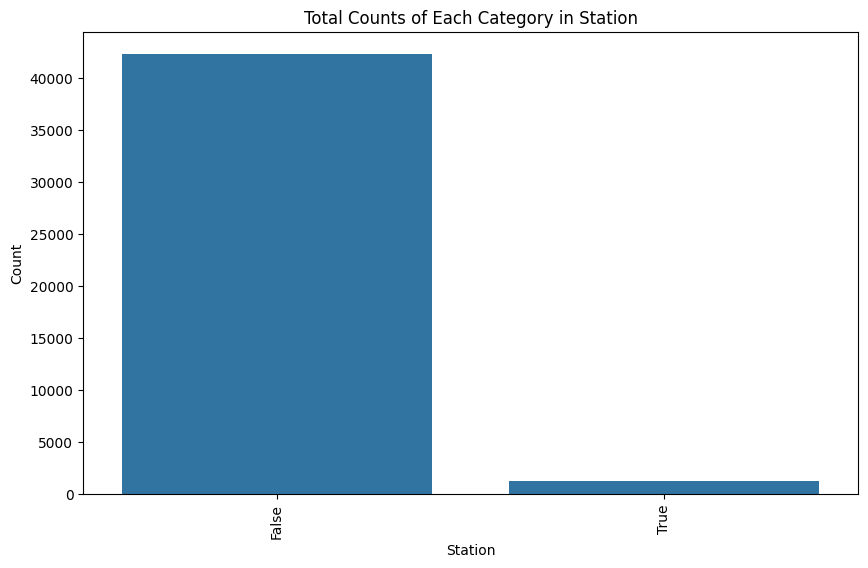

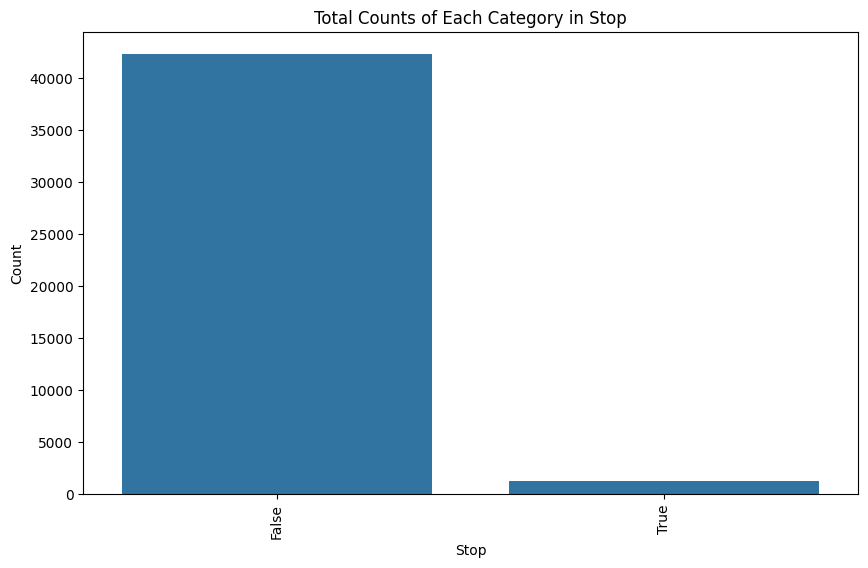

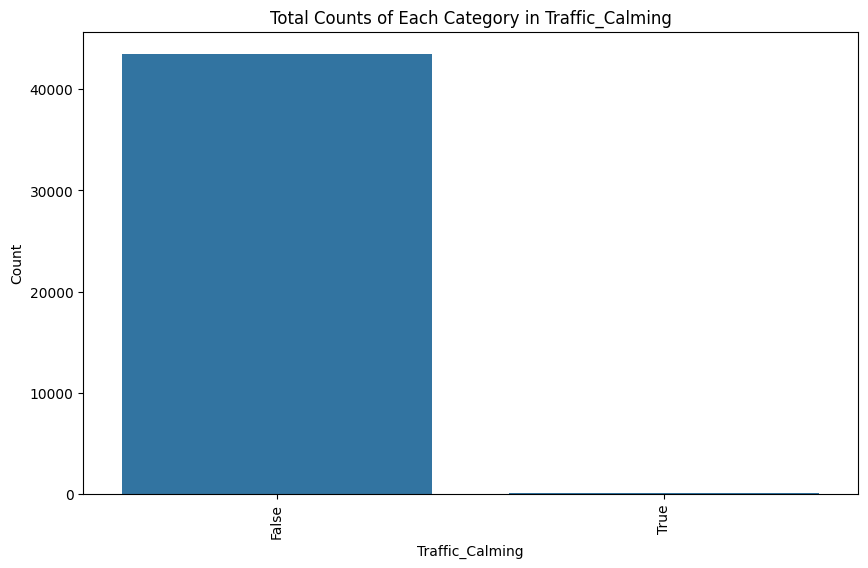

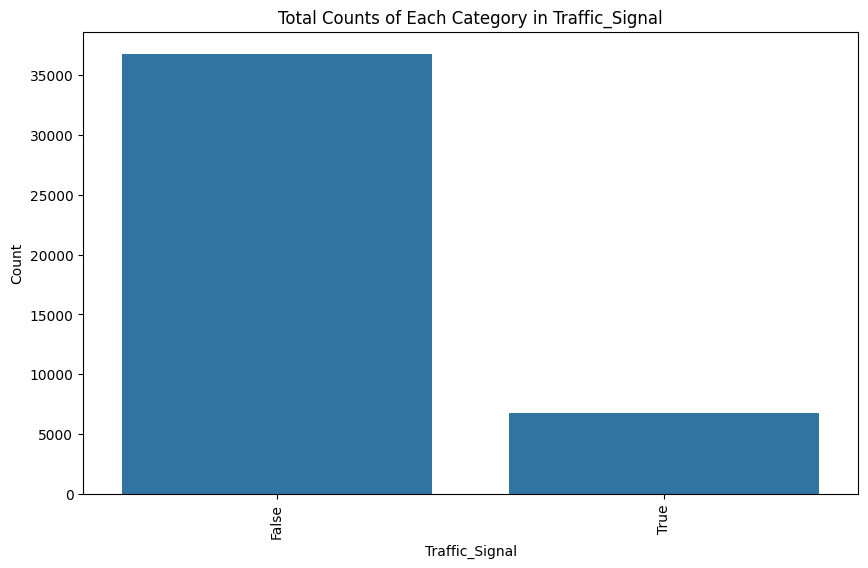

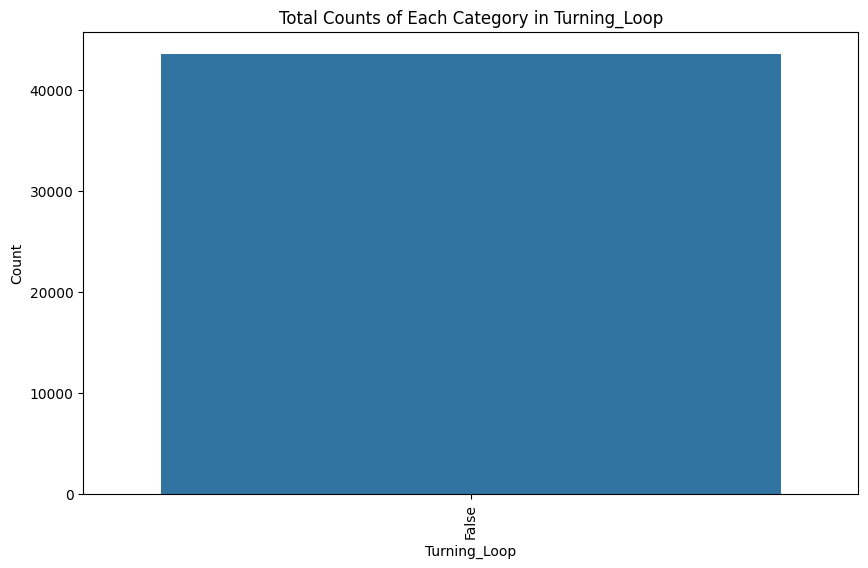

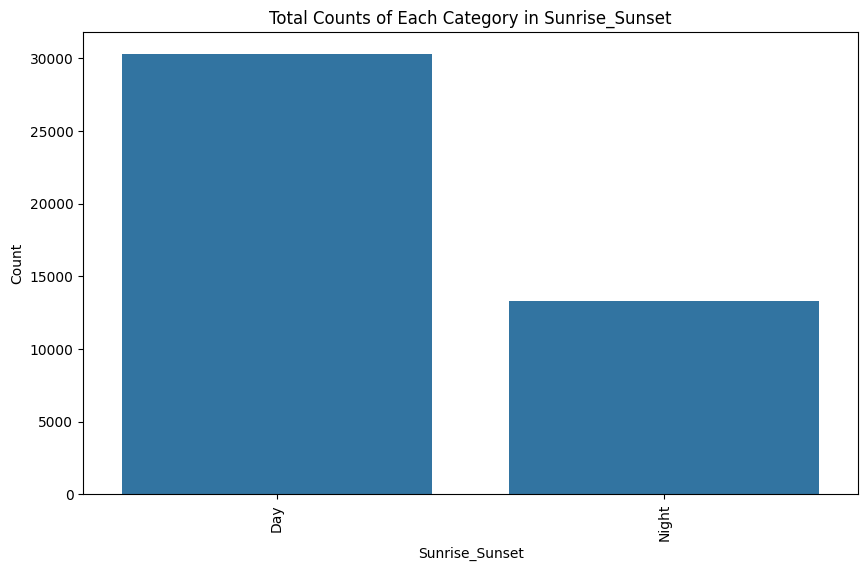

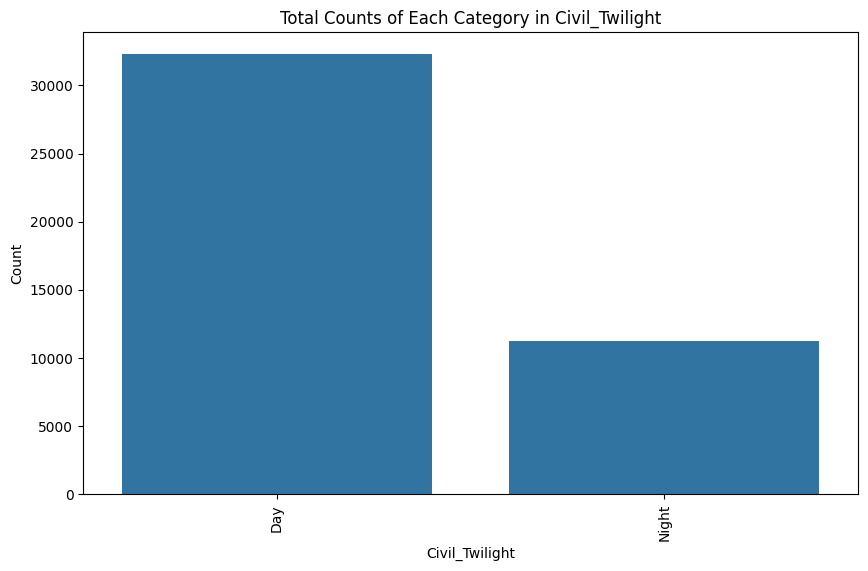

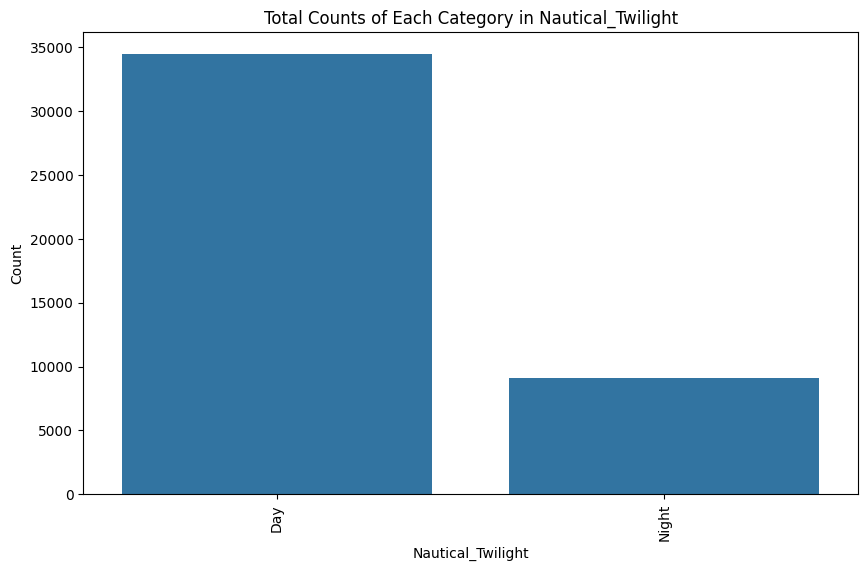

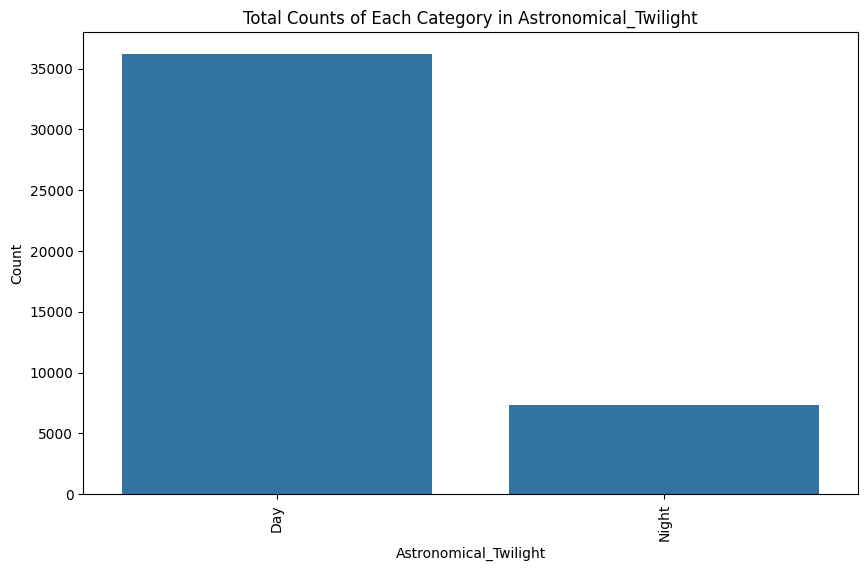

In [ ]:


# Create bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=US_Accidents_Cleaned, order=US_Accidents_Cleaned[column].value_counts().index)
    plt.title(f'Total Counts of Each Category in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


   Severity  Precipitation(in)
0         1           0.011385
1         2           0.051480
2         3           0.093834
3         4           0.078013


Text(0, 0.5, 'Mean Precipitation (in)')

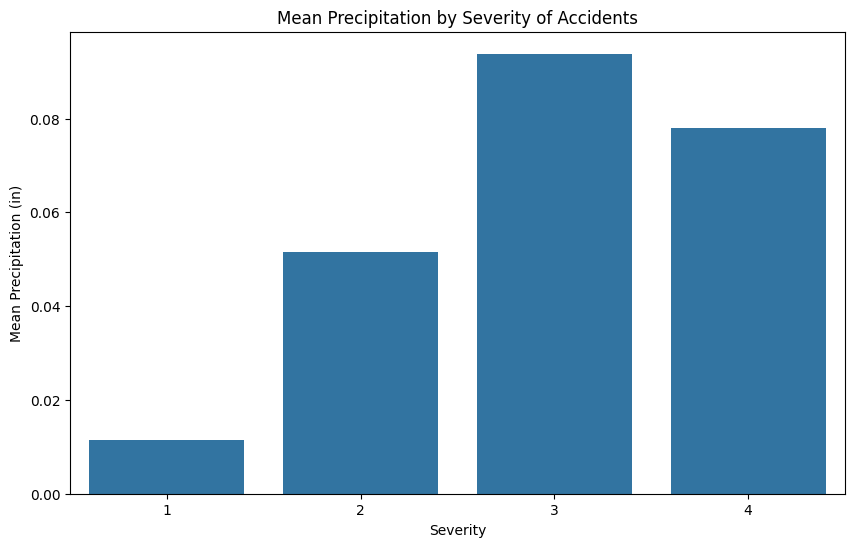

In [ ]:
# Group by 'Severity' and calculate the mean precipitation for each severity level
grouped_data_2 = US_Accidents_Cleaned.groupby('Severity')['Precipitation(in)'].mean().reset_index()

#print(grouped_data_2)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Severity', y='Precipitation(in)', data=grouped_data_2)
plt.title('Mean Precipitation by Severity of Accidents')
plt.xlabel('Severity')
plt.ylabel('Mean Precipitation (in)')

In [ ]:
# mean, median, and modes for each numerical column
for column in columns_to_plot:
    mean = US_Accidents_Cleaned[column].mean()
    median = US_Accidents_Cleaned[column].median()
    mode = US_Accidents_Cleaned[column].mode().values[0]

    print(f'{column} - Mean: {mean}, Median: {median}, Mode: {mode}')


Severity - Mean: 2.2271370856670645, Median: 2.0, Mode: 2
Start_Time - Mean: 2020-03-16 17:42:44.033146624, Median: 2020-06-13 13:37:30, Mode: 2018-12-12T17:58:00.000000000
End_Time - Mean: 2020-03-17 00:04:36.539344128, Median: 2020-06-13 15:03:30, Mode: 2018-12-12T18:27:00.000000000
Start_Lat - Mean: 36.25646374170462, Median: 35.80694, Mode: 34.055695
Start_Lng - Mean: -94.950883798555, Median: -87.95708450000001, Mode: -118.451965
End_Lat - Mean: 36.25653860287439, Median: 35.807001, Mode: 25.73316
End_Lng - Mean: -94.95067634044739, Median: -87.95771049999999, Mode: -80.336612
Distance(mi) - Mean: 0.5016214764042558, Median: 0.01, Mode: 0.0
Weather_Timestamp - Mean: 2020-03-16 17:43:52.590212096, Median: 2020-06-13 13:55:30, Mode: 2020-12-16T13:53:00.000000000
Temperature(F) - Mean: 61.642023230190055, Median: 64.0, Mode: 73.0
Wind_Chill(F) - Mean: 52.96138355110515, Median: 57.0, Mode: 26.145430107526888
Humidity(%) - Mean: 65.05527499770453, Median: 67.0, Mode: 100.0
Pressure(in

In [ ]:
# the mean, median, and modes for each weather-related column based on the severity of the accident
# List of weather-related columns
weather_columns = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Group by Severity and calculate mean, median, and mode for each weather-related column
for column in weather_columns:
    grouped = US_Accidents_Cleaned.groupby('Severity')[column].agg(['mean', 'median', lambda x: x.mode().values[0]]).reset_index()
    grouped.columns = ['Severity', 'Mean', 'Median', 'Mode']
    print(f"Statistics for {column}:")
    print(grouped)
    print("\n")

Statistics for Temperature(F):
   Severity       Mean  Median  Mode
0         1  72.187961    74.0  77.0
1         2  61.515386    64.0  73.0
2         3  62.119780    64.9  68.0
3         4  58.146830    60.0  59.0


Statistics for Wind_Chill(F):
   Severity       Mean     Median      Mode
0         1  71.417081  74.000000  77.00000
1         2  53.919693  58.000000  26.14543
2         3  48.644005  52.000000  26.14543
3         4  48.332902  48.452586  26.14543


Statistics for Humidity(%):
   Severity       Mean  Median   Mode
0         1  64.056511    69.0   93.0
1         2  64.843782    67.0  100.0
2         3  65.737336    68.0   93.0
3         4  66.928442    69.0   93.0


Statistics for Pressure(in):
   Severity       Mean  Median   Mode
0         1  29.325627   29.63  29.90
1         2  29.536915   29.85  29.99
2         3  29.673473   29.92  30.01
3         4  29.455063   29.84  29.89


Statistics for Visibility(mi):
   Severity      Mean  Median  Mode
0         1  9.435012 

**Conclusions:**















**Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!**

Yes, the data was what I expected and is still usable

**What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?**

The shape of the distribution changes based on the columns. As expected the Severity column has a discrete distribution. The "Temperature", "Pressure", "Humidity" columns are left skewed while the "wind_Speed", "Visibility" and and "Precipitation" are right skewed. The Wind_Chill column looks to be bimodal

**Are there any outliers present?  (Data points that are far from the others.)**

Yes, The "Pressure", "wind_Speed", "Visibility" and and "Precipitation" columns have outlier values

**If there are multiple related histograms, how does the distribution change across different groups?**

The grouped histograms that show the count of accidents by severity either during the day or night show that even though there is more accidents during the day, the distribution of severity doesn't look different between day and night

**What are the minimum and maximum values represented in each histogram?**

**How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?**

Though changing the bin size makes graphs smother, it's not revealing new patterns in the data

**Does the distribution appear normal, or does it have a different distribution?**

Most of the weather related columns have a normal distribution (but skewed left or right) while datetime related columns have a different distributions with two or multiple modes

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

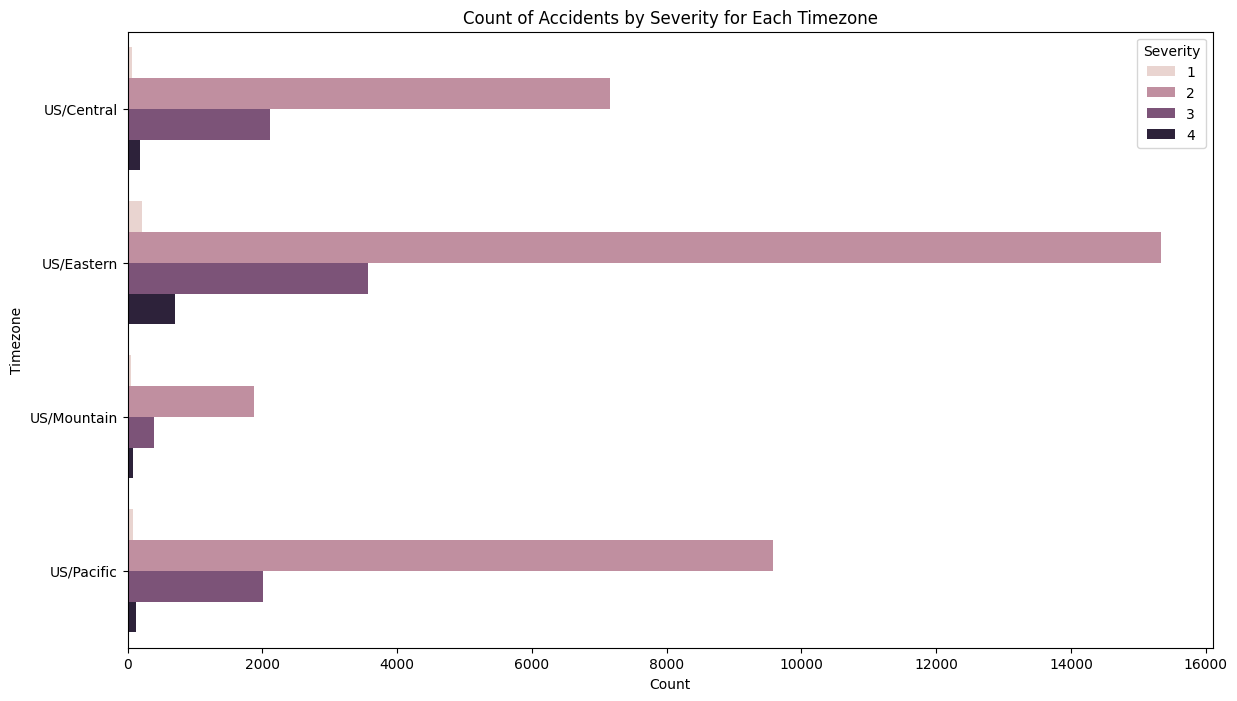

In [ ]:
# Group the data by 'Timezone' and 'Severity' and count the occurrences
grouped_data_3 = US_Accidents_Cleaned.groupby(['Timezone', 'Severity']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Timezone', hue='Severity', data=grouped_data_3)
plt.title('Count of Accidents by Severity for Each Timezone')
plt.xlabel('Count')
plt.ylabel('Timezone')
plt.legend(title='Severity')